# <center>**- SES 722 : TP n°4 Économétrie -**</center>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
import statsmodels.api as sm

In [2]:
plt.style.available
# https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

['tableau-colorblind10',
 'seaborn-bright',
 'seaborn-poster',
 'ggplot',
 'seaborn',
 'seaborn-muted',
 'seaborn-dark-palette',
 'fast',
 'seaborn-darkgrid',
 'seaborn-talk',
 'Solarize_Light2',
 'classic',
 'fivethirtyeight',
 'bmh',
 'seaborn-pastel',
 'seaborn-deep',
 'seaborn-notebook',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-paper',
 'grayscale',
 'dark_background',
 '_classic_test',
 'seaborn-white',
 'seaborn-colorblind']

## **Exercice 1 :**

In [3]:
df = pd.read_csv('textfiles/HPRICE3.raw', delim_whitespace=True, header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1978,48,2304,4,3000,1000,6.9078,60000,7,1660,4578,1,10700,9.277999,11.00210,0,7.414573,8.429017,47.71770
1,1978,83,6889,4,4000,1000,6.9078,40000,6,2612,8370,2,11000,9.305651,10.59663,0,7.867871,9.032409,47.71770
2,1978,58,3364,4,4000,1000,6.9078,34000,6,1144,5000,1,11500,9.350102,10.43412,0,7.042286,8.517193,47.71770
3,1978,11,121,4,4000,1000,6.9078,63900,5,1136,10000,1,11900,9.384294,11.06507,0,7.035269,9.210340,47.71770
4,1978,48,2304,4,4000,2000,7.6009,44000,5,1868,10000,1,12100,9.400961,10.69195,0,7.532624,9.210340,57.77368


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,1979.327103,18.009346,1381.566978,2.208723,15822.429907,16442.367601,9.480513,96100.660436,6.585670,2106.728972,39629.890966,2.339564,20715.576324,9.837414,11.378118,0.442368,7.597232,10.301858,90.482246
std,1.492329,32.565845,4801.788757,2.164353,8967.106296,9033.130652,0.777165,43223.728867,0.901204,694.957902,39514.390241,0.770526,8508.183950,0.478383,0.438174,0.497443,0.340723,0.801751,14.066470
min,1978.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,6.907800,26000.000000,4.000000,735.000000,1710.000000,1.000000,5000.000000,8.517193,10.165850,0.000000,6.599871,7.444249,47.717700
25%,1978.000000,0.000000,0.000000,0.000000,9000.000000,9000.000000,9.105000,65000.000000,6.000000,1560.000000,16935.000000,2.000000,13400.000000,9.503010,11.082140,0.000000,7.352441,9.737138,82.901020
50%,1978.000000,4.000000,16.000000,2.000000,14000.000000,16000.000000,9.680300,85900.000000,7.000000,2056.000000,43560.000000,2.000000,19900.000000,9.898475,11.360940,0.000000,7.628518,10.681890,93.708210
75%,1981.000000,22.000000,484.000000,4.000000,23000.000000,24000.000000,10.086000,120000.000000,7.000000,2544.000000,46100.000000,3.000000,27200.000000,10.210970,11.695250,1.000000,7.841493,10.738570,101.727400
max,1981.000000,189.000000,35721.000000,6.000000,35000.000000,34000.000000,10.434000,300000.000000,10.000000,5136.000000,544500.000000,4.000000,40000.000000,10.596630,12.611540,1.000000,8.544030,13.207620,108.868400


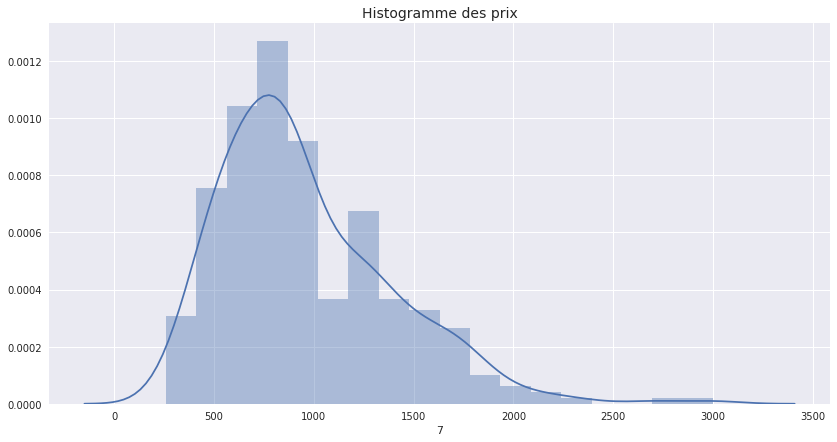

In [6]:
price = df[7] / 100

plt.figure(figsize=(14,7))
sns.distplot(price)
plt.grid(True)
plt.title("Histogramme des prix", fontsize=14)
plt.show()

In [7]:
s = np.shape(price)
const = np.ones(s)

age = df[1]
nbh = df[3]
inst = df[5]
rooms = df[8]
area = df[9]
land = df[10]
baths = df[11]
dist = df[12]
y81 = df[15]
y = price

col = {'const':const, 'age':age, 'nbh':nbh, 'inst':inst, 'rooms':rooms, 'area':area , 'land': land, 'baths':baths, 'dist': dist, 'y81':y81}
X = pd.DataFrame(data=col)
#X = np.column_stack((const,age,nbh,inst,rooms,area,land,baths,dist,y81))

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
s = y81==0
p0 = np.mean(price[s])
s = y81==1
p1 = np.mean(price[s])
print(p1-p0)

                            OLS Regression Results                            
Dep. Variable:                      7   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     86.73
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           2.14e-79
Time:                        20:28:54   Log-Likelihood:                -2201.6
No. Observations:                 321   AIC:                             4423.
Df Residuals:                     311   BIC:                             4461.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -211.1428    105.234     -2.006      0.0

## **Exercice 2 :**
Tester l’hypothèse d’homoscédasticité en utilisant la régression de $u^2$ en fonction des variables du modèle.

In [8]:
u = results.resid
u2 = u**2
y = u2

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     13.53
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           2.57e-18
Time:                        20:28:54   Log-Likelihood:                -4234.7
No. Observations:                 321   AIC:                             8489.
Df Residuals:                     311   BIC:                             8527.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.307e+04   5.93e+04      0.389      0.6

> $F = 13.53$ (statistique de Fischer). On rejette l’hypothèse $H_0$.

## **Exercice 3 :**
Tester l’hypothèse $H_0$ : $θ_{area} = θ_{land} = 0$

### Modèle non contraint

In [9]:
X.head()

,const,age,nbh,inst,rooms,area,land,baths,dist,y81
0,1.0,48,4,1000,7,1660,4578,1,10700,0
1,1.0,83,4,1000,6,2612,8370,2,11000,0
2,1.0,58,4,1000,6,1144,5000,1,11500,0
3,1.0,11,4,1000,5,1136,10000,1,11900,0
4,1.0,48,4,2000,5,1868,10000,1,12100,0


In [10]:
X0 = X
y = price

model = sm.OLS(y,X0)
results = model.fit()
u = results.resid
SSR0 = u.T@u
u2 = u**2

model=sm.OLS(u2,X0)
results = model.fit()
print(results.summary())
u=results.resid
SSR0 = u.T @ u

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     13.53
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           2.57e-18
Time:                        20:28:54   Log-Likelihood:                -4234.7
No. Observations:                 321   AIC:                             8489.
Df Residuals:                     311   BIC:                             8527.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.307e+04   5.93e+04      0.389      0.6

### Modèle contraint

In [11]:
# on retire du modèle area et land
col3 = {'const':const, 'age':age, 'nbh':nbh, 'inst':inst, 'rooms':rooms, 'baths':baths, 'dist': dist, 'y81':y81}
X3 = pd.DataFrame(data=col3)

# on garde le même u2
model = sm.OLS(u2,X3)
results = model.fit()
print(results.summary())
u = results.resid
SSR3 = u.T@u

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.369
Date:                Sun, 08 Mar 2020   Prob (F-statistic):            0.00176
Time:                        20:28:54   Log-Likelihood:                -4276.0
No. Observations:                 321   AIC:                             8568.
Df Residuals:                     313   BIC:                             8598.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.073e+04    6.7e+04      0.608      0.5

In [12]:
SSR3

6990697128053.16

In [13]:
from scipy.stats import f


n,k = np.shape(X0)
F = ((SSR3-SSR0)/2)/(SSR0/(n-k))
 
print('pvalue', f.sf(F,2,n-k) )
print('Fisher', F)

pvalue 3.908173420358547e-18
Fisher 45.72369277599905


$F = 45.72$

On rejette donc l'hypothèse  $𝐻_0$  ($p_{value} < 0.01$).

## **Exercice 4 :**
Donner la valeur minimale et maximale de baths. 

In [14]:
baths.min()

1

In [15]:
baths.max()

4

Transformer ensuite la variable `baths` en un ensemble de variables binaires. 

In [16]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder pour baths
ohe = OneHotEncoder(categories='auto')
X_baths = ohe.fit_transform(X[['baths']]).toarray()
X_baths = pd.DataFrame(X_baths)

In [17]:
col_baths = {'baths1':X_baths[0], 'baths2':X_baths[1], 'baths3':X_baths[2], 'baths4':X_baths[3]}
X_baths = pd.DataFrame(data=col_baths)

In [18]:
X_baths

,baths1,baths2,baths3,baths4
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
316,1.0,0.0,0.0,0.0
317,0.0,0.0,1.0,0.0
318,0.0,1.0,0.0,0.0
319,0.0,1.0,0.0,0.0


In [19]:
col4 = {'const':const, 'age':age, 'nbh':nbh, 'inst':inst, 'rooms':rooms, 'area':area , 'land': land,
        'baths2':X_baths['baths2'], 'baths3':X_baths['baths3'], 'baths4':X_baths['baths4'], 'dist': dist, 'y81':y81}
X4 = pd.DataFrame(data=col4)
y = price

In [20]:
model = sm.OLS(y,X4)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      7   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     72.22
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           1.33e-78
Time:                        20:28:55   Log-Likelihood:                -2198.8
No. Observations:                 321   AIC:                             4422.
Df Residuals:                     309   BIC:                             4467.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.3626    113.493     -0.312      0.7

> On constate donc que le fait d'avoir **3 salles de bain** permet de gagner **24 800 dollars** de plus sur la vente d'une maison. 


On refait le test d’hétéroscédasticité de l’exercice 2.

In [21]:
u = results.resid
u2 = u**2

model = sm.OLS(u2,X4)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     10.97
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           3.93e-17
Time:                        20:28:55   Log-Likelihood:                -4227.2
No. Observations:                 321   AIC:                             8478.
Df Residuals:                     309   BIC:                             8524.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7663.0126    6.3e+04      0.122      0.9

Résultat pour la statistique de Fisher et la p-value : 
* F = 10.87
* p-value = 3.93e-17

On rejette l’hypothèse $H_0$ car $p < 0.01$.

## **Exercice 5 :**
En utilisant la spécification de l'exercice 4, refaire le test d'hétéroscédasticité en utilisant `log(area)` et `log(land)`.

In [22]:
log_area = np.log(area)
log_land = np.log(land)

In [23]:
col5 = {'const':const, 'age':age, 'nbh':nbh, 'inst':inst, 'rooms':rooms, 'log_area':log_area , 'log_land':log_land,
        'baths2':X_baths['baths2'], 'baths3':X_baths['baths3'], 'baths4':X_baths['baths4'], 'dist':dist, 'y81':y81}
X5 = pd.DataFrame(data=col5)
y = price

In [24]:
model=sm.OLS(y,X5)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      7   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     69.51
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           8.66e-77
Time:                        20:28:56   Log-Likelihood:                -2203.2
No. Observations:                 321   AIC:                             4430.
Df Residuals:                     309   BIC:                             4476.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3479.2455    460.500     -7.555      0.0

### Test d'hétéroscédasticité

In [25]:
u = results.resid
u2 = u**2

model = sm.OLS(u2,X5)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     5.419
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           6.86e-08
Time:                        20:28:56   Log-Likelihood:                -4281.0
No. Observations:                 321   AIC:                             8586.
Df Residuals:                     309   BIC:                             8631.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.44e+06   2.98e+05     -4.831      0.0

$F = 5.419$

On rejette l'hypothèse $H_0$ car $p_{value} = 6.86e-08 < 0.01$.

## **Exercice 6 :**
En utilisant la spécification de l’exercice 5, refaire le test d’hétéroscédasticité en utilisant $y = log(\frac{price}{100})$ .

In [26]:
col6 = {'const':const, 'age':age, 'nbh':nbh, 'inst':inst, 'rooms':rooms, 'log_area':log_area , 'log_land':log_land,
        'baths2':X_baths['baths2'], 'baths3':X_baths['baths3'], 'baths4':X_baths['baths4'], 'dist':dist, 'y81':y81}
X6 = pd.DataFrame(data=col6)
y = np.log(price)

In [27]:
model = sm.OLS(y,X6)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      7   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           3.52e-96
Time:                        20:28:56   Log-Likelihood:                 56.624
No. Observations:                 321   AIC:                            -89.25
Df Residuals:                     309   BIC:                            -43.99
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3297      0.403      5.774      0.0

### Test d'hétéroscédasticité

In [28]:
u = results.resid
u2 = u**2

model = sm.OLS(u2, X6)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.905
Date:                Sun, 08 Mar 2020   Prob (F-statistic):             0.0381
Time:                        20:28:56   Log-Likelihood:                 268.51
No. Observations:                 321   AIC:                            -513.0
Df Residuals:                     309   BIC:                            -467.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4437      0.209     -2.128      0.0

$F = 1.905$

On rejette l'hypothèse $H_0$ car $p_{value} = 0.0381 < 0.05$.

## **Exercice 7 :**
> Utiliser la variable `log_land` pour pondérer les observations dans la spécification de l'exercice 6.
Refaire le test d’hétéroscédasticité.

In [29]:
h = np.sqrt(log_land)
y = np.log(price)

col7 = {'const':const, 'age':age, 'nbh':nbh, 'inst':inst, 'rooms':rooms, 'log_area':log_area , 'log_land':log_land,
        'baths2':X_baths['baths2'], 'baths3':X_baths['baths3'], 'baths4':X_baths['baths4'], 'dist':dist, 'y81':y81}
X7 = pd.DataFrame(data=col7)

model=sm.WLS(y, X7,weight=1/h)
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      7   R-squared:                       0.785
Model:                            WLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           3.52e-96
Time:                        20:28:56   Log-Likelihood:                 56.624
No. Observations:                 321   AIC:                            -89.25
Df Residuals:                     309   BIC:                            -43.99
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3297      0.403      5.774      0.0

### Test d'hétéroscédasticité

In [30]:
u = results.resid
u2 = u**2

model = sm.OLS(u2, X7)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.905
Date:                Sun, 08 Mar 2020   Prob (F-statistic):             0.0381
Time:                        20:28:56   Log-Likelihood:                 268.51
No. Observations:                 321   AIC:                            -513.0
Df Residuals:                     309   BIC:                            -467.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4437      0.209     -2.128      0.0

$F = 1.905$

On rejette l'hypothèse $H_0$ car $p_{value} = 0.0381 < 0.05$.

## **Exercice 8 :**
Faire le graphique en nuage de point entre `log(price/100)` et `log_land`.
Diviser l’échantillon en deux groupes en fonction de `log_land` et refaire le test d’hétéroscédasticité pour les deux sous-groupes.
Construction de deux groupes : `log_land` $<= 10$ et `log_land` $> 10$.

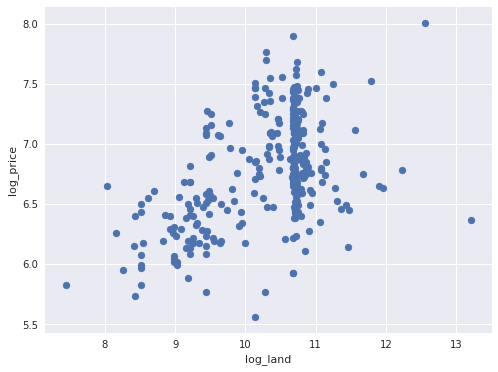

In [32]:
log_price = np.log(price)
plt.figure(figsize=(8,6))
plt.scatter(log_land, log_price)
plt.xlabel("log_land")
plt.ylabel("log_price")
plt.show()

### Groupe : `log_land` $<= 10$

In [60]:
y = np.log(price)

col8 = {'const':const, 'age':age, 'nbh':nbh, 'inst':inst, 'rooms':rooms, 'log_area':log_area , 'log_land':log_land,
        'baths2':X_baths['baths2'], 'baths3':X_baths['baths3'], 'baths4':X_baths['baths4'], 'dist':dist, 'y81':y81}
X8 = pd.DataFrame(data=col8)

masque = log_land <= 10
y = y[masque]
X8 = X8[masque]

In [63]:
model = sm.OLS(y,X8)
results = model.fit()
#print(results.summary())
u = results.resid
u2 = u**2

model = sm.OLS(u2,X8)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.072
Method:                 Least Squares   F-statistic:                    0.3985
Date:                Sun, 08 Mar 2020   Prob (F-statistic):              0.944
Time:                        20:42:15   Log-Likelihood:                 146.43
No. Observations:                  91   AIC:                            -270.9
Df Residuals:                      80   BIC:                            -243.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0750      0.195     -0.384      0.7

$F = 0.3985$

On ne rejette pas l'hypothèse $H_0$ car $p_{value} = 0.944 > 0.05$.

### Groupe : `log_land` $> 10$

In [64]:
y = np.log(price)

col8 = {'const':const, 'age':age, 'nbh':nbh, 'inst':inst, 'rooms':rooms, 'log_area':log_area , 'log_land':log_land,
        'baths2':X_baths['baths2'], 'baths3':X_baths['baths3'], 'baths4':X_baths['baths4'], 'dist':dist, 'y81':y81}
X8 = pd.DataFrame(data=col8)

masque = log_land > 10
y = y[masque]
X8 = X8[masque]

In [65]:
model = sm.OLS(y,X8)
results = model.fit()
#print(results.summary())
u = results.resid
u2 = u**2

model = sm.OLS(u2,X8)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.373
Date:                Sun, 08 Mar 2020   Prob (F-statistic):              0.187
Time:                        20:51:18   Log-Likelihood:                 165.68
No. Observations:                 230   AIC:                            -307.4
Df Residuals:                     218   BIC:                            -266.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3093      0.396     -0.781      0.4

$F = 1.373$

On ne rejette pas l'hypothèse $H_0$ car $p_{value} = 0.187 > 0.05$.